# Project 4 - Question 1
# Factors that impact salary

<div class="alert alert-block alert-info">
<b>Import all required libraries and folders</b> 
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model
import sklearn.model_selection
import sklearn.tree
import sklearn.ensemble
from sklearn.tree import DecisionTreeClassifier

# S K L E A R N
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import SGDClassifier

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#from myfunctions import myfunc
import myfunctions as myfunc

C:\Users\sergi\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


<div class="alert alert-block alert-info">
<b>Read Seek cleaned data into a DataFrame</b> 
</div>

In [2]:
df = pd.read_csv('Datasets/SEEK_Cleaned.csv', index_col=0)
#SEEK_Cleaned.csv
df;

In [3]:
df.dtypes;

In [4]:
df.salary.median()

121256.0

<div class="alert alert-block alert-info">
<b>Categorize Cities</b> 
</div>

In [5]:
df.groupby(['city']).size()

city
ACT                                      254
Adelaide                                 121
Adelaide Hills & Barossa                   2
Albury Area                                7
Alice Springs & Central Australia          9
Bairnsdale & Gippsland                     3
Ballarat & Central Highlands               3
Bendigo, Goldfields & Macedon Ranges       5
Blue Mountains & Central West              6
Brisbane                                 425
Broome & Kimberley                         1
Bunbury & South West                       1
Bundaberg & Wide Bay Burnett               2
Cairns & Far North                         4
Darwin                                    13
Dubbo & Central NSW                        2
Gladstone & Central QLD                    1
Gold Coast                                 9
Gosford & Central Coast                   32
Hobart                                    10
Horsham & Grampians                        2
Kalgoorlie, Goldfields & Esperance         3
Launc

In [6]:
city_list = ['Sydney', 'Melbourne', 'Brisbane', 'ACT', 'Perth', 'Adelide']

def location(city):
    if city in city_list:
        return city
    else: 
        return 'Other Location'

df.city = df.city.apply(lambda city: location(city))

df.city.value_counts()

Sydney            1886
Melbourne         1035
Brisbane           425
Other Location     377
ACT                254
Perth              219
Name: city, dtype: int64

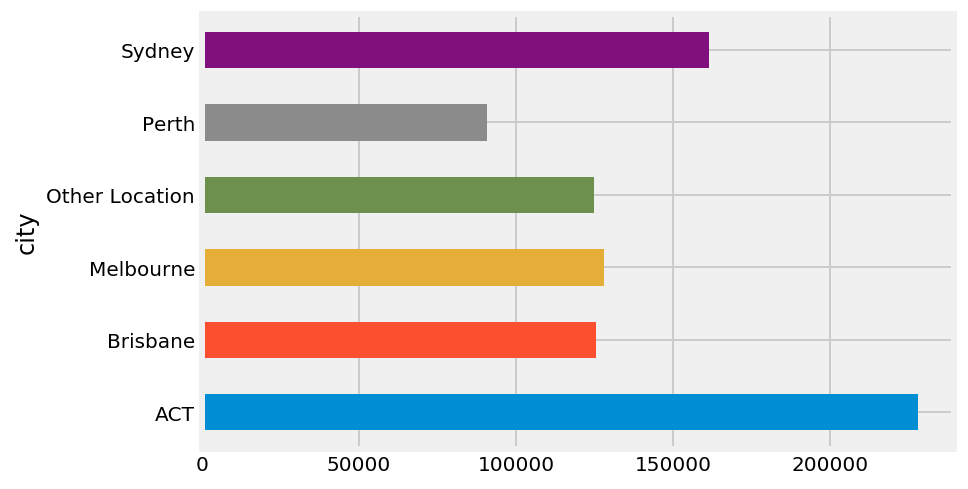

In [7]:
%matplotlib inline
def plot_salary_by_state(column_name):
    df.groupby(column_name).salary.mean().plot.barh()

plot_salary_by_state('city')

<div class="alert alert-block alert-info">
<b>Categorize Suburbs</b> 
</div>

In [8]:
# Create a Feature CBD

CBD_list = ['CBD, Inner West & Eastern Suburbs','CBD & Inner Suburbs','CBD, Inner & Western Suburbs']

def CBD(city):
    if city in CBD_list:
        return 1
    else: return 0

df['CBD'] = df.suburb.apply(lambda city: CBD(city))

df.CBD.value_counts()


0    4196
Name: CBD, dtype: int64

<div class="alert alert-block alert-info">
<b>Categorize Category</b> 
</div>

In [9]:
df.category.value_counts();

In [10]:
cat_list = df.dropna().groupby(['category']).salary.median()
cat_list;

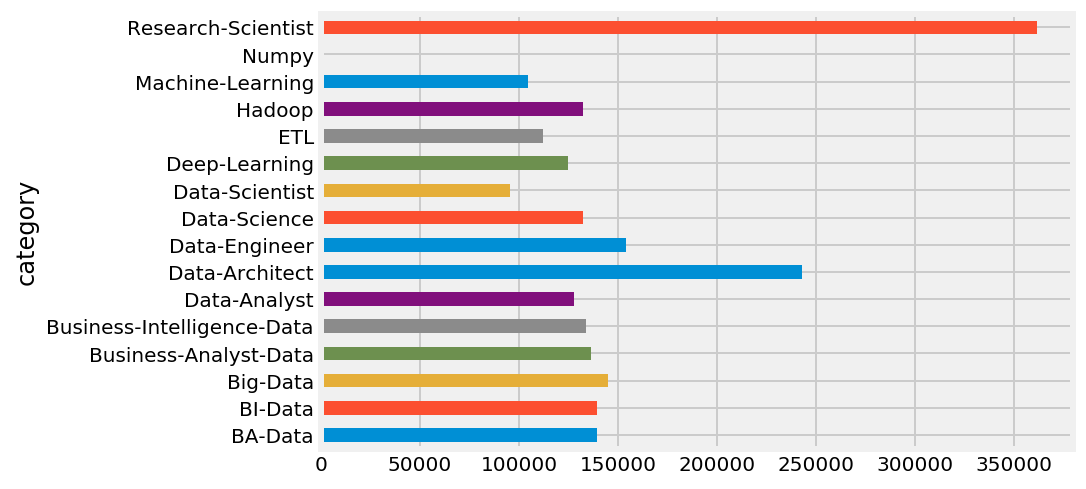

In [11]:
%matplotlib inline
def plot_mean_by_something(column_name):
    df.groupby(column_name).salary.mean().plot.barh()

plot_mean_by_something('category')

<div class="alert alert-block alert-info">
<b>Categorize Classifications</b> 
</div>

In [12]:
sub_class_list = list(df.sub_classificaiton.value_counts().head(15).index)

def sub_class(x):
    if x in sub_class_list:
        return x
    else: return 'Other sub Classification'

df.sub_classificaiton = df.sub_classificaiton.apply(lambda x: sub_class(x))

df.sub_classificaiton.value_counts();

<div class="alert alert-block alert-info">
<b>Creating a log salary</b> 
</div>

C:\Users\sergi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Salary')

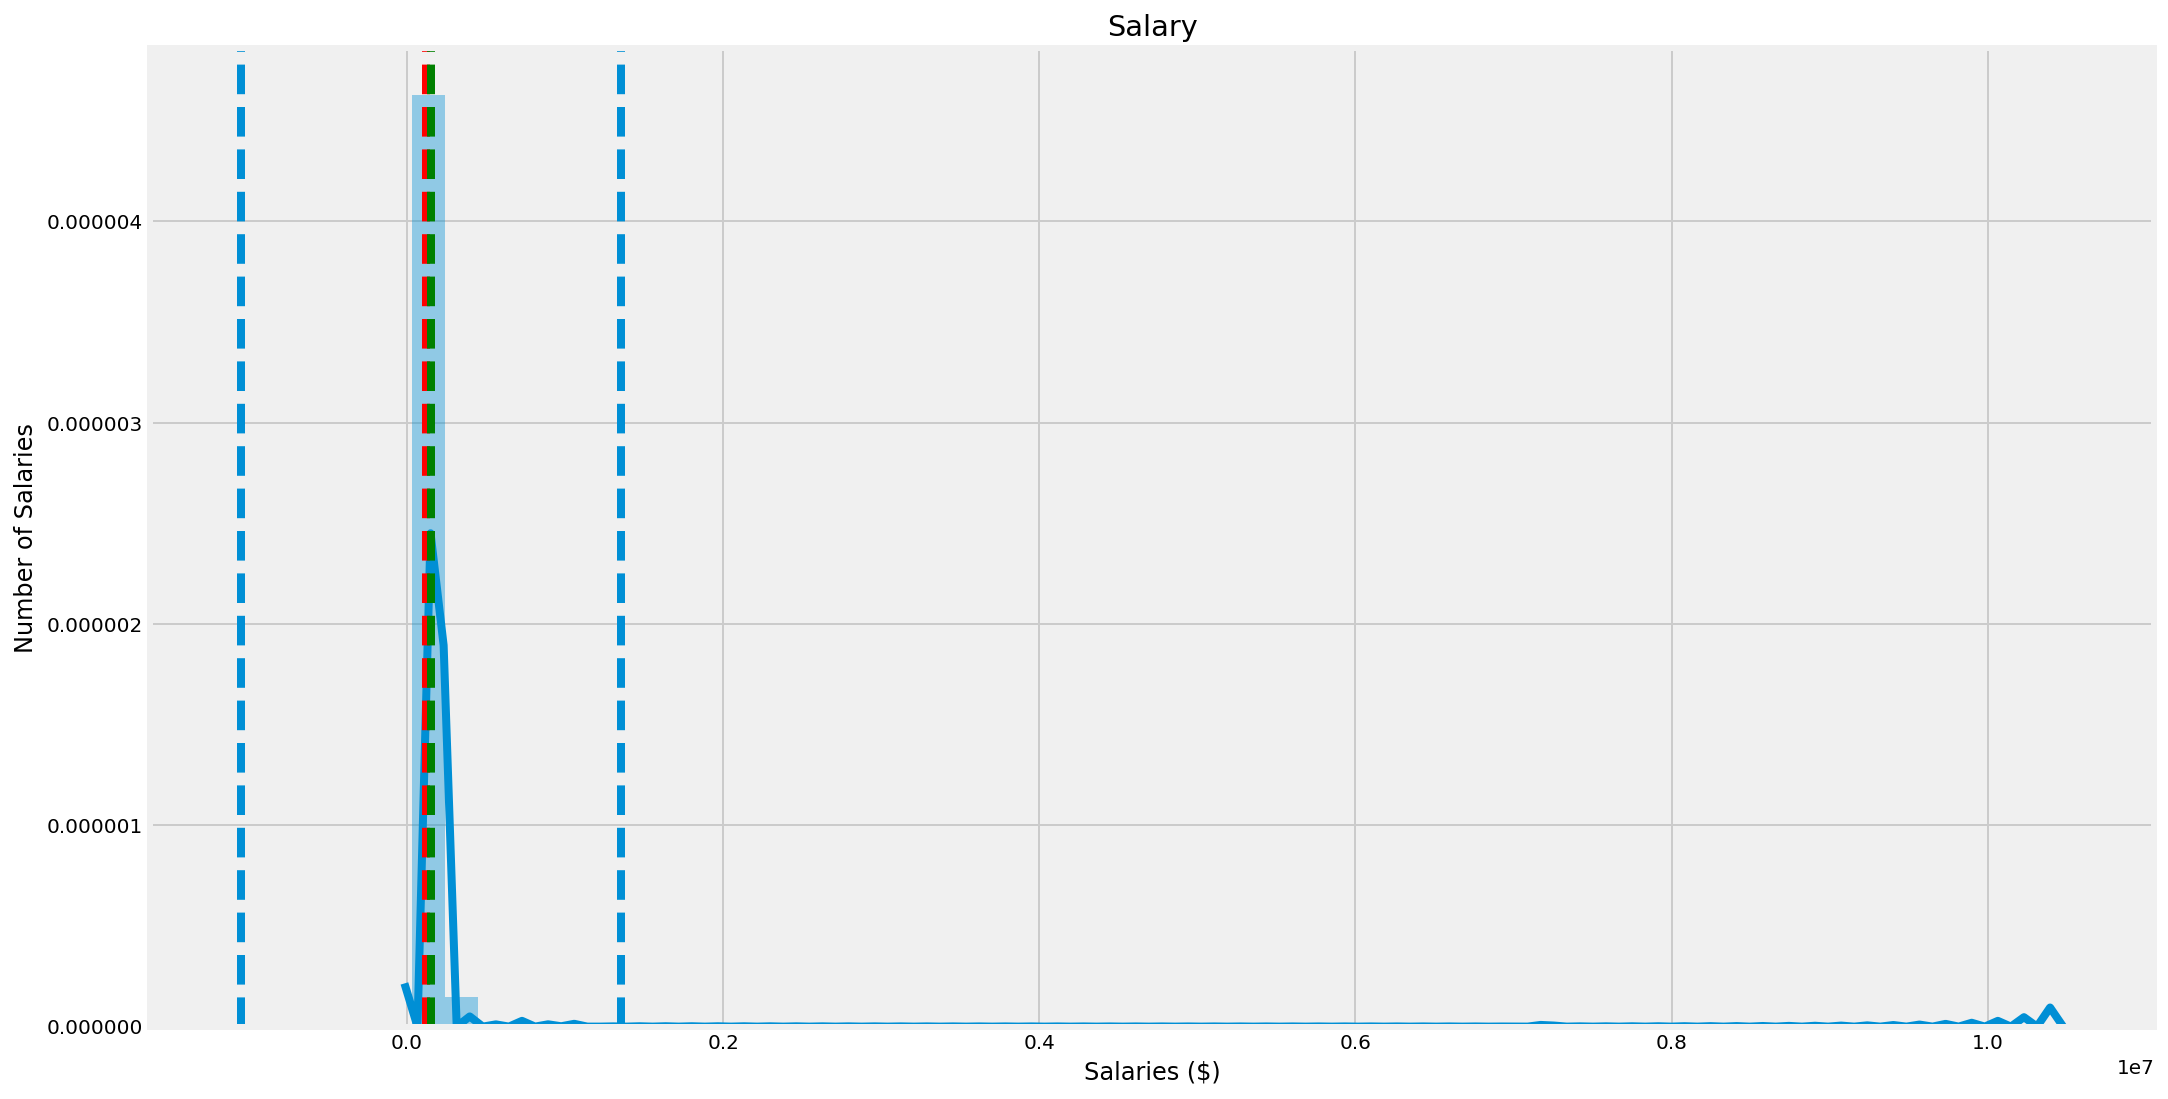

In [13]:
plt.figure(figsize=(16,9))
# df.salary = df.salary.astype(int)

sns.distplot(df.salary.dropna())

plt.axvline(np.percentile(df.salary.dropna(),[50]), c='red', linestyle='dashed')
plt.axvline(df.salary.dropna().mean() , c='green', linestyle='dashed')                   
plt.axvline(df.salary.dropna().mean() + df.salary.dropna().std()*3, linestyle='dashed')   
plt.axvline(df.salary.dropna().mean() - df.salary.dropna().std()*3, linestyle='dashed')
plt.xlabel('Salaries ($)')
plt.ylabel('Number of Salaries')
plt.title('Salary')

In [14]:
# Create Logarithm salary
df['log_salary'] = np.log(df.salary)

C:\Users\sergi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Salary Logarithm')

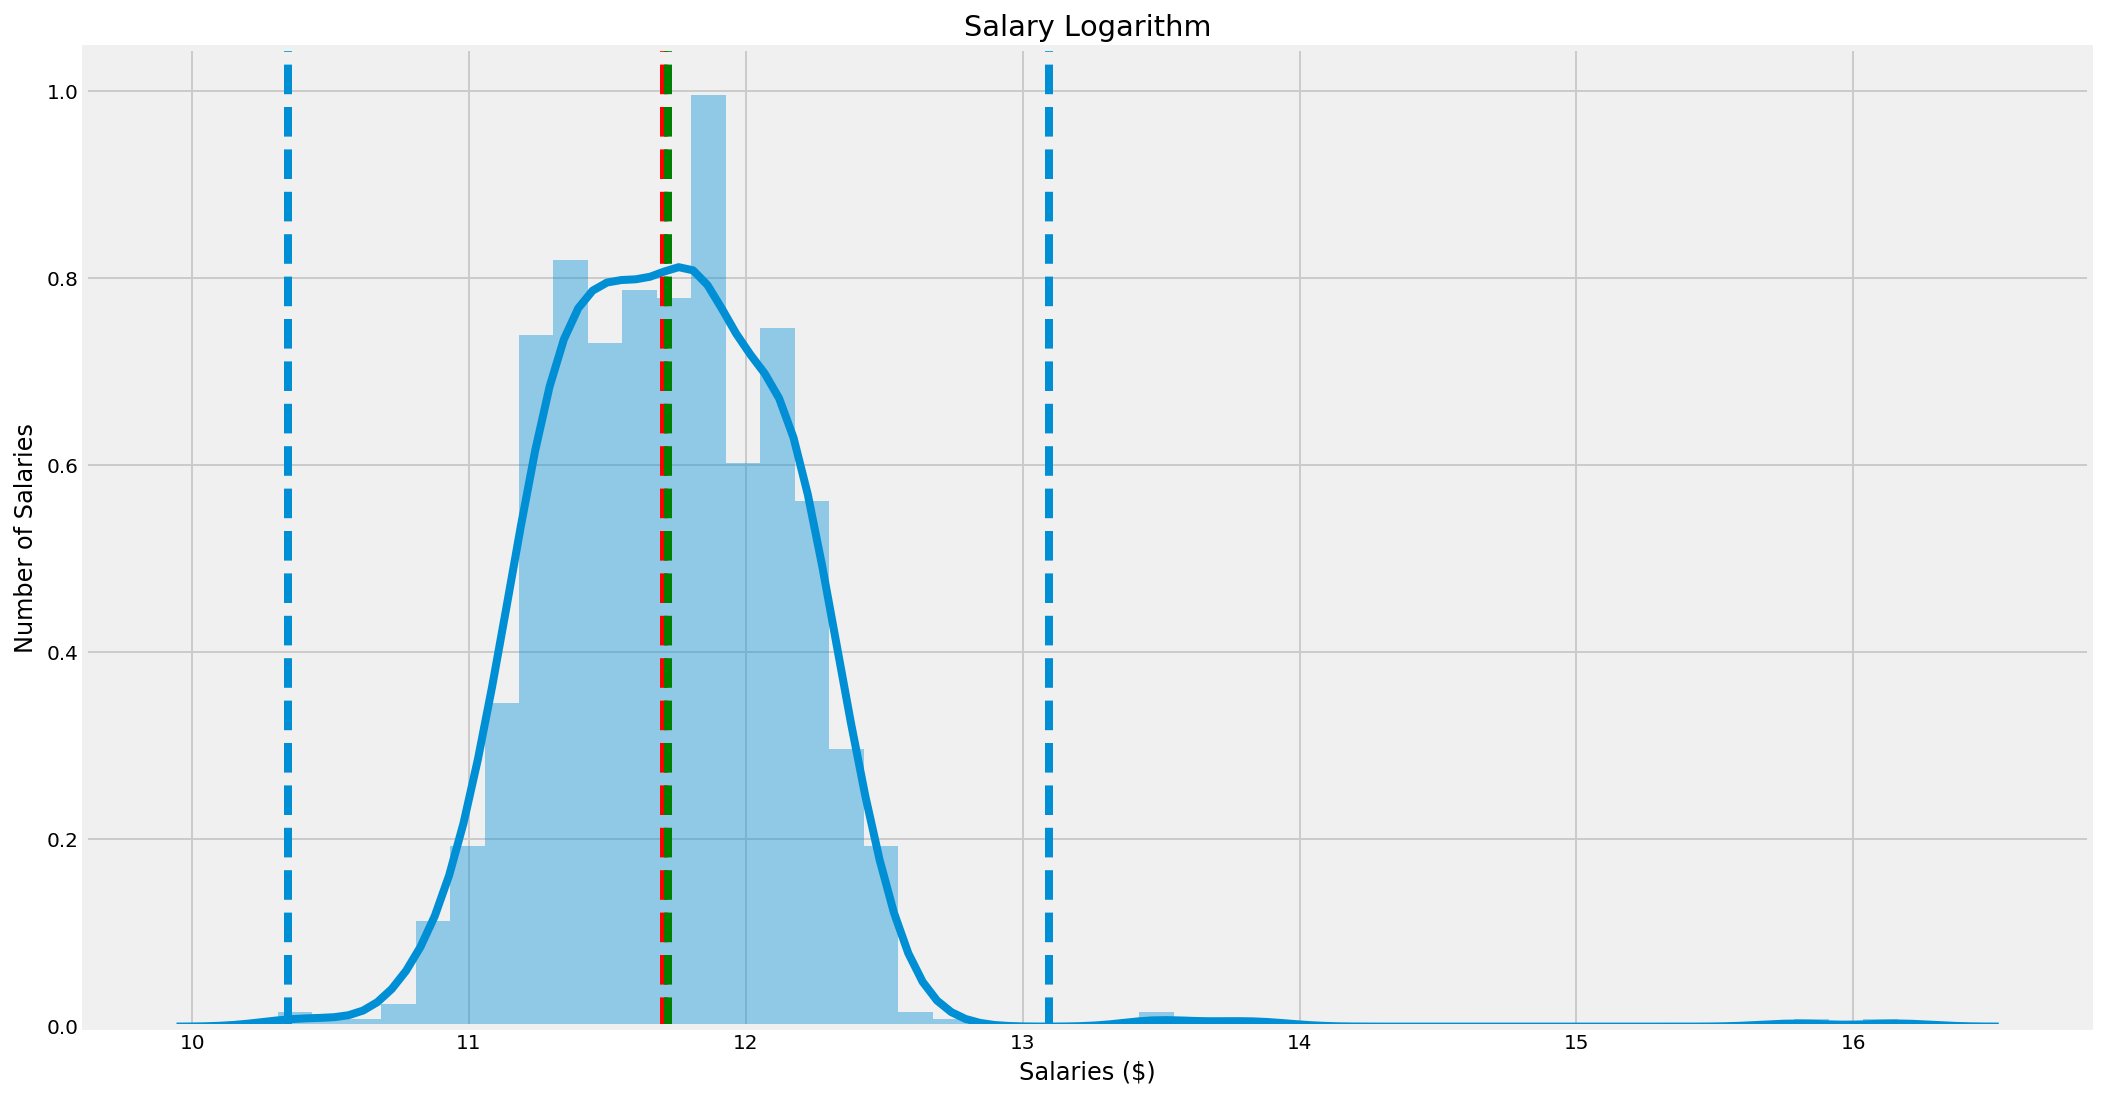

In [15]:
# Plot Logorithm salary
plt.figure(figsize=(16,9))
sns.distplot(df.log_salary.dropna())

plt.axvline(np.percentile(df.log_salary.dropna(),[50]), c='red', linestyle='dashed')
plt.axvline(df.log_salary.dropna().mean() , c='green', linestyle='dashed')
plt.axvline(df.log_salary.dropna().mean() + df.log_salary.dropna().std()*3, linestyle='dashed')   
plt.axvline(df.log_salary.dropna().mean() - df.log_salary.dropna().std()*3, linestyle='dashed')
plt.xlabel('Salaries ($)')
plt.ylabel('Number of Salaries')
plt.title('Salary Logarithm')

In [16]:
df.category.value_counts()

Data-Analyst                  569
Data-Science                  539
Data-Architect                539
Data-Engineer                 422
Deep-Learning                 408
Business-Intelligence-Data    356
Business-Analyst-Data         271
Machine-Learning              270
BI-Data                       227
Big-Data                      159
Research-Scientist            130
Data-Scientist                118
ETL                           100
BA-Data                        60
Hadoop                         26
Numpy                           2
Name: category, dtype: int64

<div class="alert alert-block alert-info">
<b>Create Train and Test Data</b>
</div>

In [17]:
df.columns

Index(['title', 'description', 'advertiser', 'date', 'salary', 'worktype',
       'classificaiton', 'sub_classificaiton', 'city', 'suburb', 'link',
       'category', 'CBD', 'log_salary'],
      dtype='object')

In [18]:
# Dropping the NOT influencial columns and also creating Y as a classification on the salary mean.

drop_columns = ['title', 'description', 'advertiser', 'date', 'salary', 'suburb', 'link', 'log_salary']

Target  = df.salary.dropna() <= df.salary.dropna().mean()     # Salary <= Salary MEAN (no Nulls on both)

New_df  = df.drop(drop_columns, axis=1)                       # Drop unwanted features
New_df  = pd.get_dummies(New_df)                              # Create Dummies on New DataFrame 

X_train = New_df[df.salary.notnull()]                         # Create X_train using New DataFrame 
X_test  = New_df[df.salary.isnull()]                          # Create X_test using New DataFrame

print (X_train.shape, X_test.shape, len(Target))

(1000, 72) (3196, 72) 1000


In [19]:
df.salary.dropna().mean()

151099.302

<div class="alert alert-block alert-info">
<b>Baseline Accuracy</b> 
</div>

In [20]:
print('Baseline accuracy:', Target.value_counts(normalize=True)[1]*100)

Baseline accuracy: 69.19999999999999


<div class="alert alert-block alert-info">
<b>Decision Tree Regressor</b> 
</div>

In [21]:
import sklearn.tree
DF = df
DTR = sklearn.tree.DecisionTreeRegressor(max_depth=3)
DTR.fit(X_train, Target)
DTR.predict(X_test)

array([0.91020408, 0.80745342, 0.80745342, ..., 0.34385965, 0.80745342,
       0.91020408])

<div class="alert alert-block alert-info">
<b>Random Forest Classifier</b> <br>To predict if the salary will be lower or higher than the average salary.
</div>

In [22]:
RandForest = sklearn.model_selection.GridSearchCV(sklearn.ensemble.RandomForestClassifier(), verbose = 1, cv = 5, n_jobs = -1, param_grid = { 
    'n_estimators': [50,200,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4, 5, 6, 7, 8],
    'criterion' :['gini', 'entropy']})

# n_estimators = number of trees in the foreset
# max_features = max number of features considered for splitting a node
# min_samples_leaf = min number of data points allowed in a leaf node
# min_samples_split = min number of data points placed in a node before the node is split
# max_depth = max number of levels in each decision tree
# bootstrap = method for sampling data points (with or without replacement)

RandForest.fit(X_train, Target)

print (RandForest.best_params_)
print (RandForest.best_score_)
print (RandForest.predict(X_test))

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:   35.2s finished


{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200}
0.76
[ True  True  True ...  True  True  True]


<div class="alert alert-block alert-info">
<b>Logistic Regression</b> <br>A negative coef_ indicates the higher class?!
</div>

In [23]:
Logistic = sklearn.linear_model.LogisticRegression()
Logistic.fit(X_train, Target)

score = sklearn.model_selection.cross_val_score(Logistic, X_train, Target, cv=4, scoring="roc_auc" )

print (score.mean())

0.67989452743788


In [24]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X_train, Target, train_size=0.5, test_size=0.5, random_state=8)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

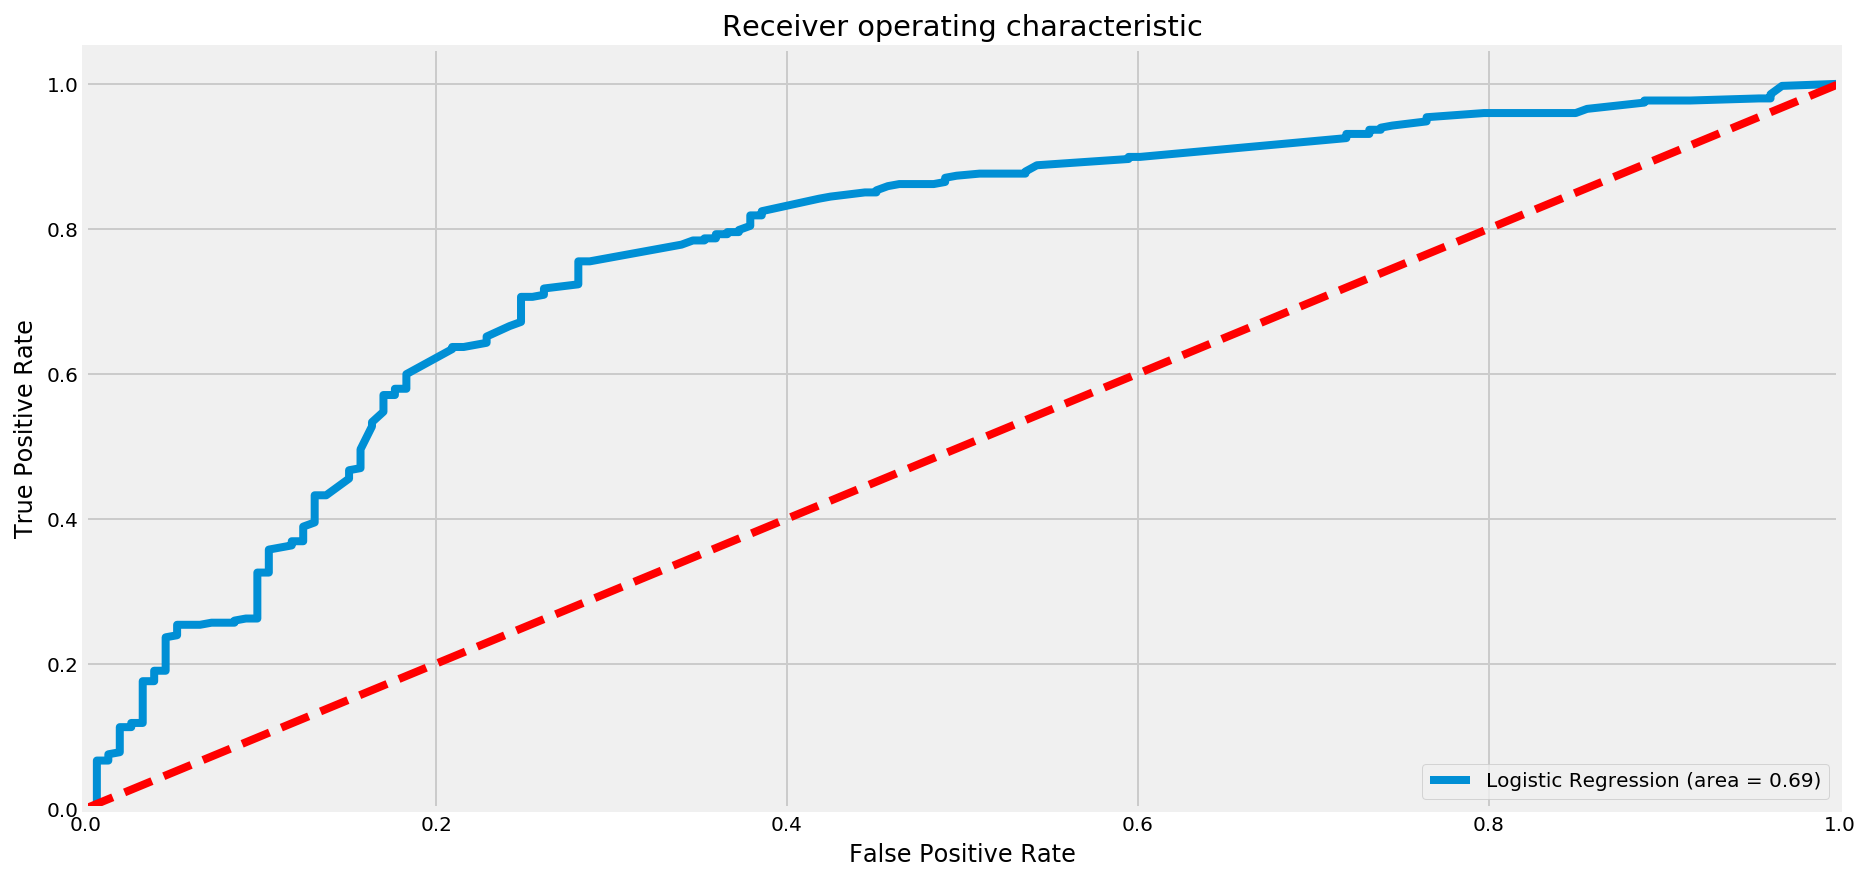

In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure(figsize=(14,7))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

plt.legend(loc="lower right")

plt.savefig('Log_ROC')
plt.show()

<div class="alert alert-block alert-info">
<b>Logistic Co-efficient</b> <br>To predict the jobs with no salary.
</div>

In [26]:
sorted(zip(Logistic.coef_[0], X_train.columns))

[(-1.457312532261747, 'classificaiton_Insurance & Superannuation'),
 (-0.9019604223677012, 'category_Data-Architect'),
 (-0.6614251865373938, 'city_Sydney'),
 (-0.659440861873624, 'classificaiton_Advertising, Arts & Media'),
 (-0.5453555298196795,
  'classificaiton_Information & Communication Technology'),
 (-0.5453555298196795,
  'sub_classificaiton_Information & Communication Technology'),
 (-0.5380142293956135, 'category_Data-Engineer'),
 (-0.49466569560915896, 'classificaiton_CEO & General Management'),
 (-0.48034630027390324, 'classificaiton_Banking & Financial Services'),
 (-0.48034630027390324, 'sub_classificaiton_Banking & Financial Services'),
 (-0.42525036391709453, 'classificaiton_Science & Technology'),
 (-0.42525036391709453, 'sub_classificaiton_Science & Technology'),
 (-0.3908770950833724, 'worktype_Contract/Temp'),
 (-0.358493032481429, 'city_Other Location'),
 (-0.35001821861882926, 'classificaiton_Sales'),
 (-0.35001821861882926, 'sub_classificaiton_Sales'),
 (-0.3189

<div class="alert alert-block alert-danger">
    <b>CODE from Here on is NOT required only for REFERENCE</b>
</div>

<div class="alert alert-block alert-success">
<b>Code NOT Used which can HELP ONLY</b>
</div>

In [ ]:
# Selecting all columns except 'salary'
feature_columns = df.loc[:, df.columns != 'salary'].columns
feature_columns

In [ ]:
# Make Salary column into an Integer
cols = ['salary']
for col in cols:
    df[col] = df[col].apply(lambda x: int(x) if x == x else 0)

In [ ]:
from sklearn.metrics import roc_curve, auc

# For class 1, find the area under the curve
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for class 1 (Has high salary)
plt.figure(figsize=[14,7])
# plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot(fpr, tpr, label='ROC curve Logistic Regression (area = %0.2f)' % logit_roc_auc)

plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for High Salary', fontsize=18)

# Plot FPR vs TPR of total data set and adjusted
plt.plot(36./(1730),(831./(994)), marker='o', color='red', markersize=20)
plt.plot(0/(1730),(64/(994)),     marker='o', color='green', markersize=20)
plt.legend(['ROC Curve', 'Baseline', 'Current Rate', 'High Precision'])
plt.show()
